In [1]:
#importing Libraries.
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
#reading Data.
mv = pd.read_csv('movies.csv')
mv

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
#checking every column's data type.
mv.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [4]:
#checking for missing data.
for col in mv.columns:
    per_missing = np.mean(mv[col].isnull())
    print('{} - {}%'.format(col, per_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
#Replace missing data.
mv_c = mv.copy()
mv_c['rating'].fillna("-", inplace=True)
mv_c['released'].fillna("-", inplace=True)
mv_c['score'].fillna(0, inplace=True)
mv_c['votes'].fillna(0, inplace=True)
mv_c['writer'].fillna("-", inplace=True)
mv_c['star'].fillna("-", inplace=True)
mv_c['country'].fillna("-", inplace=True)
mv_c['budget'].fillna(0, inplace=True)
mv_c['gross'].fillna(0, inplace=True)
mv_c['company'].fillna("-", inplace=True)
mv_c['runtime'].fillna(0, inplace=True)
mv_c

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,-,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,0.0,-,90.0
7664,Dream Round,-,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0.0,0.0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,-,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,0.0,Embi Productions,0.0
7666,It's Just Us,-,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000.0,0.0,-,120.0


In [6]:
mv = mv_c
mv

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,-,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,0.0,-,90.0
7664,Dream Round,-,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0.0,0.0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,-,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,0.0,Embi Productions,0.0
7666,It's Just Us,-,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000.0,0.0,-,120.0


In [7]:
#checking for missing data again.
for col in mv.columns:
    per_missing = np.mean(mv[col].isnull())
    print('{} - {}%'.format(col, per_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [8]:
#Getting rid of unnecessary formats.
mv['budget'] = mv['budget'].astype('int64')
mv['gross'] = mv['gross'].astype('int64')
mv['votes'] = mv['votes'].astype('int64')
mv['runtime'] = mv['runtime'].astype('int64')
mv.head(50)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100


In [9]:
#checking for duplicates.
mv_c.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,-,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,-,90
7664,Dream Round,-,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90
7665,Saving Mbango,-,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0
7666,It's Just Us,-,Drama,2020,"October 1, 2020 (United States)",0.0,0,James Randall,James Randall,Christina Roz,United States,15000,0,-,120


In [10]:
#common analysis
mv.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7668.000000,7.668000e+03,7.668000e+03,7.668000e+03,7668.000000
mean,2000.405451,6.387911,8.807403e+04,2.551350e+07,7.656567e+07,107.205660
std,11.153508,0.976862,1.633011e+05,3.858954e+07,1.641217e+08,18.737179
min,1980.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1991.000000,5.800000,9.100000e+03,0.000000e+00,3.860582e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,1.200000e+07,1.895543e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,3.200000e+07,7.262022e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [11]:
#From this we can see that budget and gross have the highest correlation then there is votes and gross.
correlationMatrix = mv.corr()
correlationMatrix

C:\Users\Lenonvo\AppData\Local\Temp\ipykernel_12404\2317731703.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix = mv.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


C:\Users\Lenonvo\AppData\Local\Temp\ipykernel_12404\3255672264.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix = mv.corr()


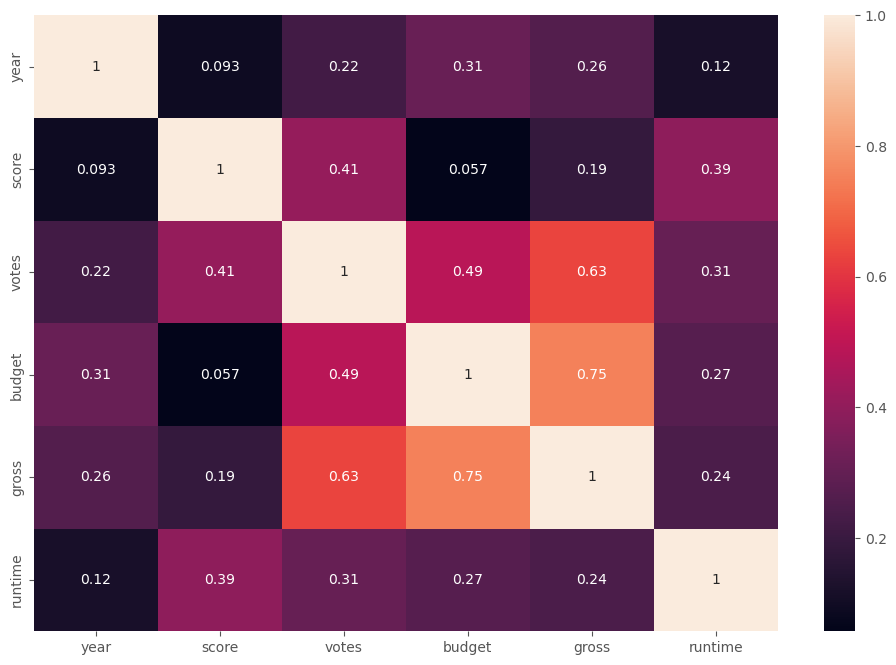

In [12]:
#Heatmap to better show the correltions.
correlationMatrix = mv.corr()

sns.heatmap(correlationMatrix, annot=True)

plt.show()

In [13]:
#looking for highest and lowest 5 by gross.
mv.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89
1601,My Twentieth Century,-,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104


In [14]:
#Number of produced films of each genre.
mv[['genre', 'name']].pivot_table(index=['genre'], aggfunc='count').T

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,Western
name,1705,427,338,443,2245,551,1518,11,44,1,322,1,2,20,10,10,1,16,3


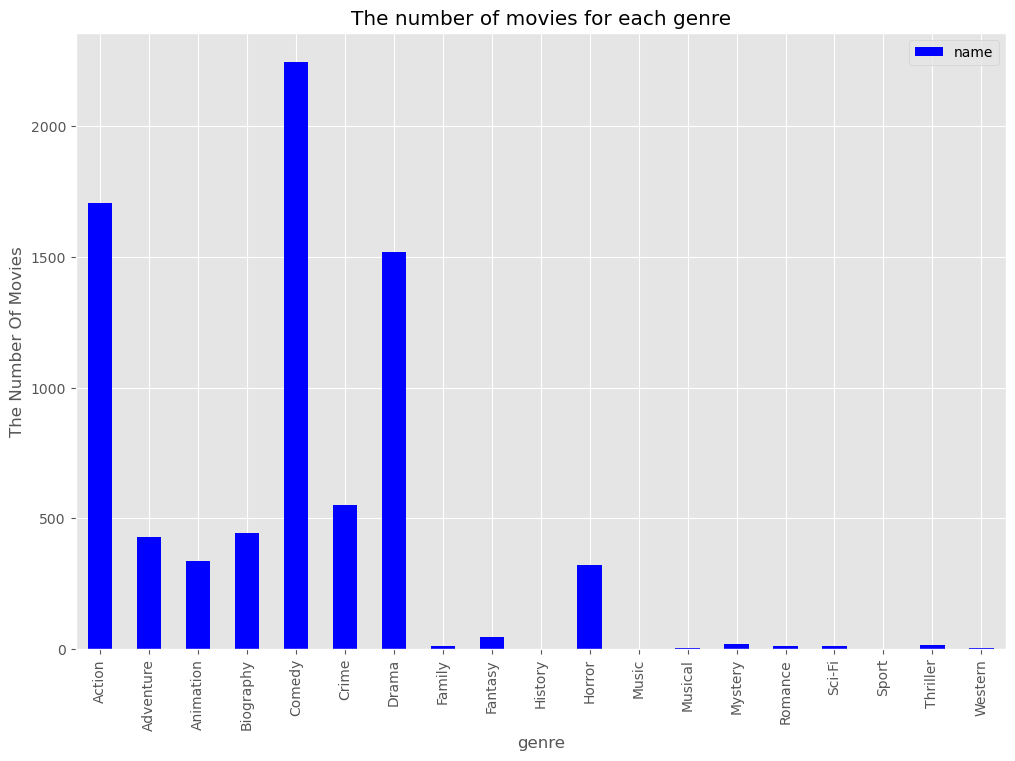

In [15]:
#Bar chart shows that comedy is the highest produced genre then action then drama and so on..
mv[['genre', 'name']].pivot_table(index=['genre'], aggfunc='count').plot(kind='bar', ylabel='The Number Of Movies', 
                                                                         title='The number of movies for each genre',
                                                                        color='blue')
plt.show()

In [16]:
#Number of gross by each genre.
mv[['genre', 'gross']].pivot_table(index=['genre'], aggfunc='sum').T

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,Western
gross,243435855754,45916596693,80142045796,20729581801,97175468462,21355448322,57150648537,2157897417,1664501135,0,14543329602,110014,5190692,2023670554,188394999,260489866,1067629,323223113,32025886


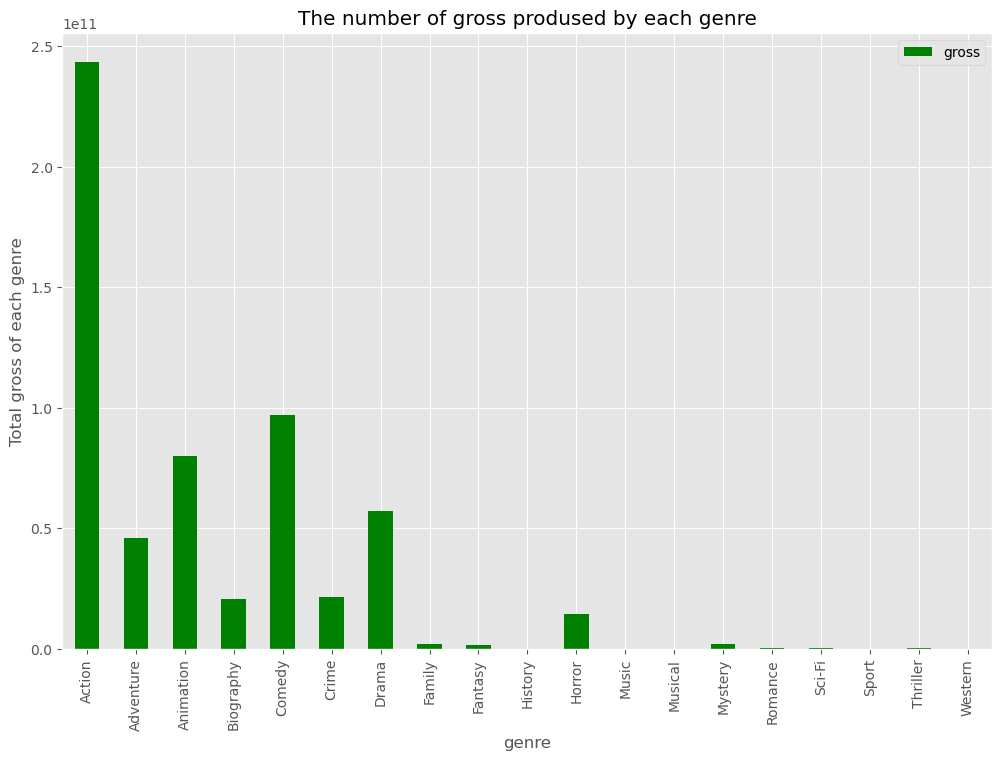

In [17]:
#As we can see, despite the fact that comedy  is the highest produced, it is the second in gross for the action genre 
mv[['genre', 'gross']].pivot_table(index=['genre'], aggfunc='sum').plot(kind='bar', ylabel='Total gross of each genre', 
                                                                         title='The number of gross prodused by each genre',
                                                                         color='green')

plt.show()

In [18]:
#Budget to gross for each genre.
mv[['genre', 'gross','budget']].pivot_table(index=['genre'], aggfunc='sum').T

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,Western
budget,82886723068,15038060000,21144070000,7973379768,34137781215,9057244080,20164855737,204500000,709200000,323562,3385842000,0,0,541900001,120200000,157870000,0,94600000,21000000
gross,243435855754,45916596693,80142045796,20729581801,97175468462,21355448322,57150648537,2157897417,1664501135,0,14543329602,110014,5190692,2023670554,188394999,260489866,1067629,323223113,32025886


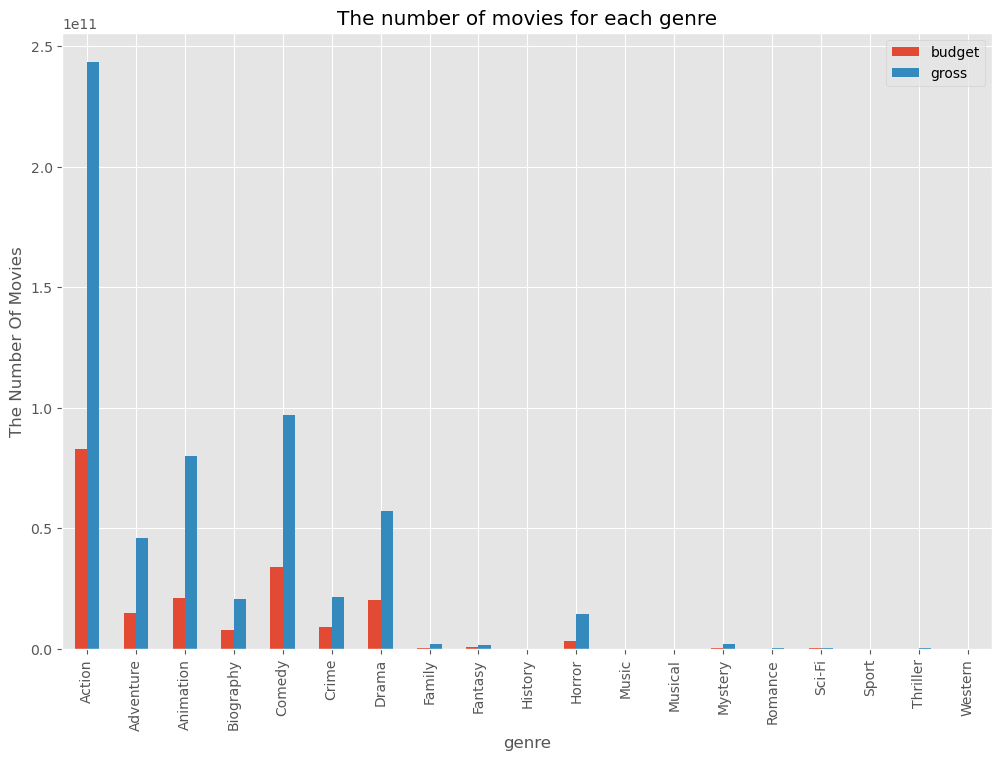

In [19]:
#Budget to gross chart.
mv[['genre','gross', 'budget']].pivot_table(index=['genre'], aggfunc='sum').plot(kind='bar', ylabel='The Number Of Movies', 
                                                                         title='The number of movies for each genre',
                                                                        )

plt.show()

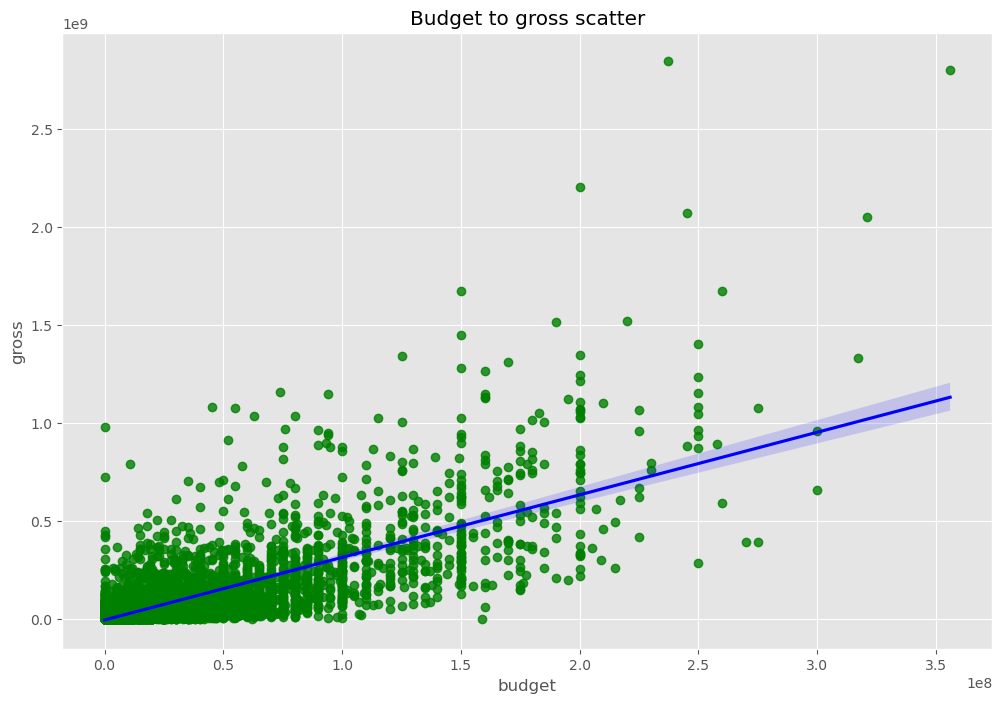

In [20]:
#Budget to gross map, we can see that all films scattered around the diagonal from high right to low left(spend - return)
sns.regplot(x='budget', y='gross', data=mv, scatter_kws={"color":"green"}, line_kws={"color":"blue"})

plt.title('Budget to gross scatter')

plt.show()

In [26]:
#Total Movies' industry for each year, with highest at 2019 and lowest at 1980
yearGross = mv[['year', 'gross']].pivot_table(index='year', aggfunc='sum')
yearGross.sort_values(by='gross', inplace=True, ascending=False)
yearGross

,gross
year,
2019,30339653041
2016,28938844792
2017,28485248415
2018,28085289459
2015,26746011088
2014,26491482563
2013,25995848674
2012,25476190195
2011,24837686836


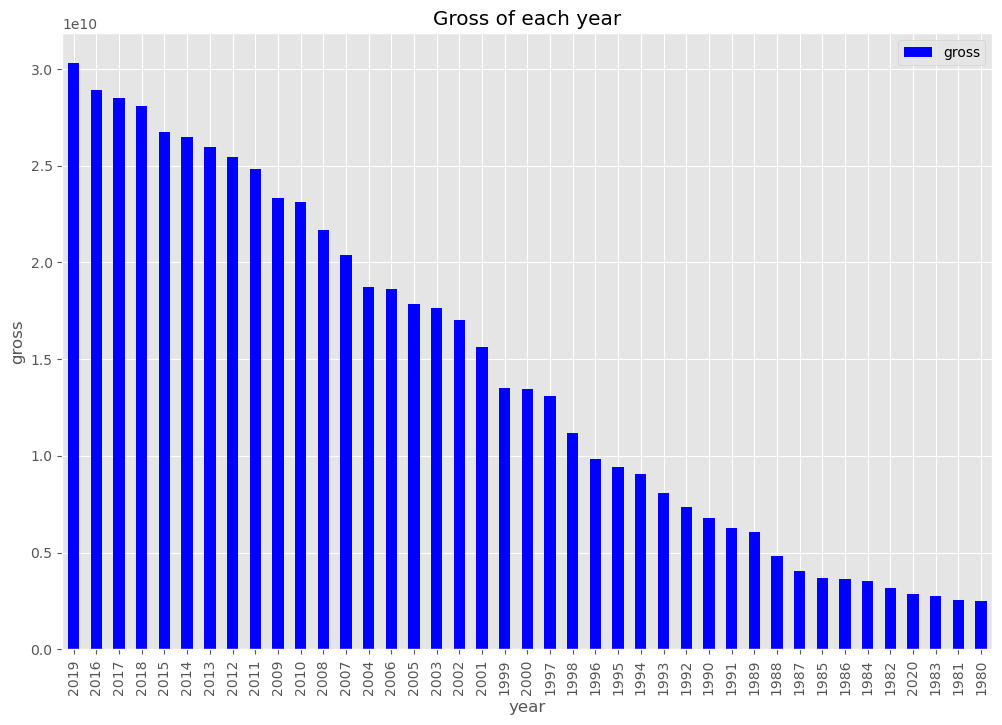

In [27]:
yearGross.plot(kind='bar', color='blue', ylabel='gross', title='Gross of each year')

plt.show()

In [28]:
mvNum = mv.copy()

for colName in mvNum.columns:
    if (mvNum[colName].dtype == 'object'):
        mvNum[colName] = mvNum[colName].astype('category')
        mvNum[colName] = mvNum[colName].cat.codes
        
mvNum

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,7,6,1980,1706,8.4,927000,2589,4015,1048,55,19000000,46998772,2320,146
1,5573,7,1,1980,1493,5.8,65000,2269,1633,328,56,4500000,58853106,732,104
2,5142,5,0,1980,1772,8.7,1200000,1111,2568,1746,56,18000000,538375067,1541,124
3,286,5,4,1980,1493,7.7,221000,1301,2001,2247,56,3500000,83453539,1813,88
4,1027,7,4,1980,1544,7.3,108000,1054,522,411,56,6000000,39846344,1778,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,0,6,2020,2965,3.1,18,1500,2290,2422,56,7000,0,2,90
7664,1678,0,4,2020,1108,4.7,36,774,2615,1887,56,0,0,540,90
7665,4717,0,6,2020,194,5.7,29,2061,2684,2041,56,58750,0,942,0
7666,2843,0,6,2020,2818,0.0,0,1184,1825,451,56,15000,0,2,120


In [29]:
mv

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,-,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,-,90
7664,Dream Round,-,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90
7665,Saving Mbango,-,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0
7666,It's Just Us,-,Drama,2020,"October 1, 2020 (United States)",0.0,0,James Randall,James Randall,Christina Roz,United States,15000,0,-,120


In [30]:
mvNumMat = mvNum.corr()

mvNumMat

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.016377,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009212,0.008483
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,0.006192,0.033743,0.019483,-0.005920,0.013404,0.081244,-0.081939,-0.095450,-0.032950,0.064133
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027384,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071066,-0.052914
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.092616,0.222427,-0.020795,-0.008655,-0.027242,-0.070938,0.309212,0.261900,-0.010433,0.116358
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.039814,0.015878,-0.001478,-0.002404,0.015776,-0.020427,0.009145,0.000519,-0.010472,0.004852
score,0.016377,0.006192,0.027384,0.092616,0.039814,1.000000,0.407101,0.010568,0.022098,-0.000026,-0.133346,0.056863,0.186012,0.005072,0.394564
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.407101,1.000000,0.000349,0.001126,-0.019146,0.073525,0.486931,0.632870,0.133455,0.306984
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.010568,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062
writer,0.009081,-0.005920,0.006567,-0.008655,-0.002404,0.022098,0.001126,0.299067,1.000000,0.027246,0.015342,-0.025912,-0.022997,0.005645,-0.004036
star,0.006472,0.013404,-0.005477,-0.027242,0.015776,-0.000026,-0.019146,0.039234,0.027246,1.000000,-0.012999,-0.019952,-0.001129,0.012439,0.009418


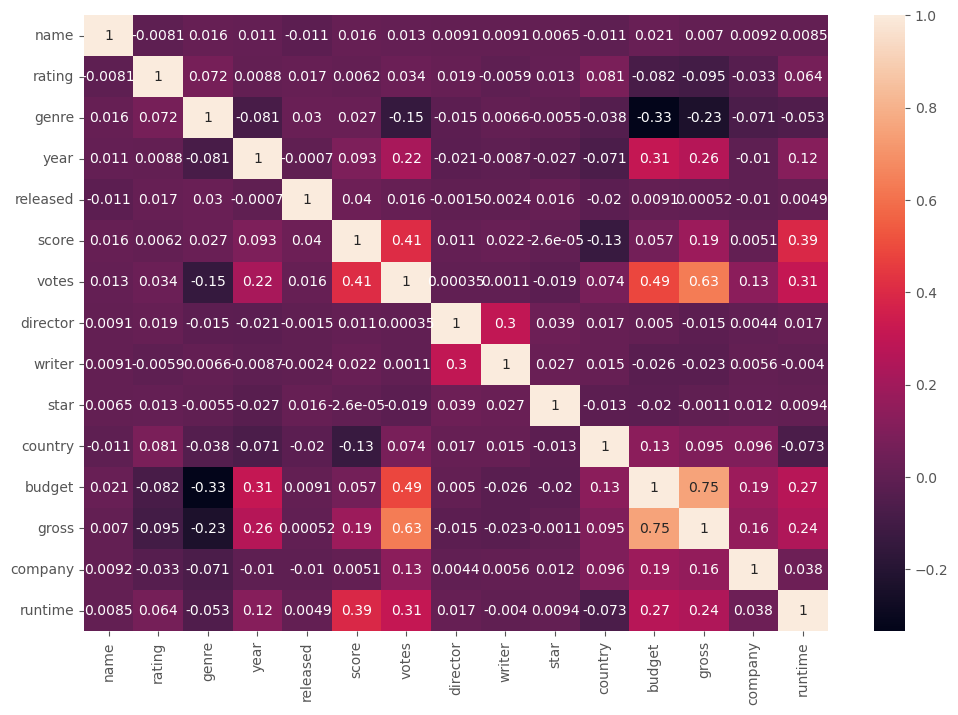

In [31]:
#Correlations between all movies' dataset elements. The more investment you put in the more return you will get out.
sns.heatmap(mvNumMat, annot=True)

plt.show()

In [32]:
corrPeirs = mvNumMat.unstack()

In [33]:
sortedPeirs = corrPeirs.sort_values()

In [34]:
#highest correlations.
highCorrelation = sortedPeirs[(sortedPeirs)>0.5]

highCorrelation.head(4)

votes   gross     0.632870
gross   votes     0.632870
        budget    0.750157
budget  gross     0.750157
dtype: float64

In [21]:
# each company share of the industry
companyShare = mv[['company', 'gross']].pivot_table(index='company', aggfunc='sum')
companyShare.sort_values(by=['gross'], inplace=True, ascending=False)
companyShare

,gross
company,
Warner Bros.,56491421806
Universal Pictures,52514188890
Columbia Pictures,43008941346
Paramount Pictures,40493607415
Twentieth Century Fox,40257053857
...,...
Georgian-Film,0
The Jerry Gross Organization,0
Abominable Pictures,0


In [22]:
#The biggist 10 companies in the market which hold more tha a Half of it's gross.
companyShare.head(10)

,gross
company,
Warner Bros.,56491421806
Universal Pictures,52514188890
Columbia Pictures,43008941346
Paramount Pictures,40493607415
Twentieth Century Fox,40257053857
Walt Disney Pictures,36327887792
New Line Cinema,19883797684
Marvel Studios,15065592411
DreamWorks Animation,11873612858


In [23]:
companyShare.tail(2376).sum()

gross    259393609575
dtype: int64

In [24]:
theWholeMarket = companyShare.head(10).T
theWholeMarket['others'] = 259393609575

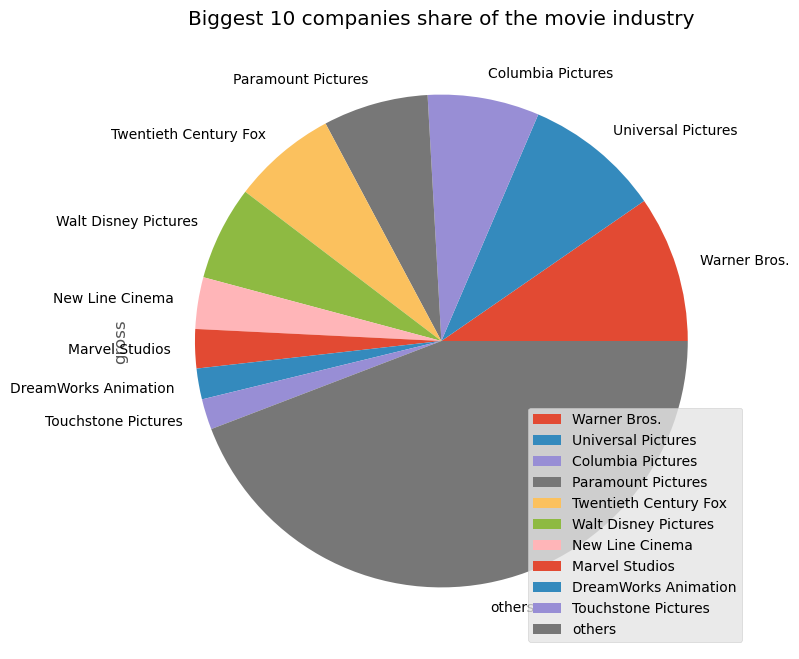

In [25]:
#The biggest 10 have more than a half of the industry, which include 2386 companies
theWholeMarket.T.plot(kind='pie', y='gross')

plt.title('Biggest 10 companies share of the movie industry')

plt.show()